In [ ]:
!pip install scipy --upgrade

In [1]:
import scipy.io
import numpy as np
from tqdm.auto import tqdm
from google.colab import drive
import matplotlib.pyplot as plt
from itertools import combinations

# pytorch for neural network
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchsummary import summary

from sklearn.metrics import f1_score, accuracy_score, classification_report

torch.manual_seed(0)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Thesis/WorkSpace

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Thesis/WorkSpace


In [3]:
from modules import data_f, network_f, network_architectures

### load the data from mat file

In [4]:
mat = scipy.io.loadmat('datasets/DREAMER.mat', simplify_cells=True)
data = mat['DREAMER']['Data']

## Using full dataset

### interpolate the signals to be of equal length

In [7]:
#person1 = data[0]

inputs = []
labels = []
for person in tqdm(data):
  scores = np.swapaxes([vals for info, vals in person.items() if 'Score' in info], 0, 1)
  scores -= 1  # to start indexing from 0

  person_signals = []
  for vid in tqdm(range(18), leave=False):
    signal_vals = []
    for signal_type in ['EEG', 'ECG']:
      for signal_mode in ['baseline', 'stimuli']:
        signal = person[signal_type][signal_mode][vid]
        for channel in np.swapaxes(signal,0,1):
          ch_interp = np.interp(np.linspace(0,len(channel)-1,32768), range(len(channel)), channel)
          signal_vals.append(ch_interp)
    person_signals.append(signal_vals)

  inputs.extend(person_signals)
  labels.extend(scores)  


inputs = np.array(inputs)
labels = np.array(labels)
print(inputs.shape)
print(labels.shape, np.unique(labels))

(414, 32, 32768)
(414, 3) [0 1 2 3 4]


### normalize the signals to be in range(-1,1)

In [6]:
data_f.normalize(inputs)

### create dataloader

In [11]:
dataloaders = {'train' : data_f.createLoader(inputs, labels[:,0], batch_size=32)}
#dataloaders = data_f.create_trainValLoaders(inputs, labels[:,0], batch_size=32, test_size=0)

### define the network

view network summary

In [12]:
model = network_architectures.Conv_Classifier(num_classes=5, inp_channels=32)
model = model.to(device)

summary(model, (32,32768))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1             [-1, 64, 8190]          24,640
              ReLU-2             [-1, 64, 8190]               0
         MaxPool1d-3             [-1, 64, 2048]               0
            Conv1d-4             [-1, 192, 512]          49,344
              ReLU-5             [-1, 192, 512]               0
         MaxPool1d-6             [-1, 192, 128]               0
            Conv1d-7             [-1, 384, 128]         221,568
              ReLU-8             [-1, 384, 128]               0
            Conv1d-9             [-1, 256, 128]         295,168
             ReLU-10             [-1, 256, 128]               0
           Conv1d-11             [-1, 256, 128]         196,864
             ReLU-12             [-1, 256, 128]               0
        MaxPool1d-13              [-1, 256, 32]               0
AdaptiveAvgPool1d-14               [-1,

set criterion and optimizer

In [13]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train the network

training network


  0%|          | 0/60 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 6  | train loss: 0.504, val loss: nan  | avg train loss: 0.700, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 12  | train loss: 0.301, val loss: nan  | avg train loss: 0.438, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 18  | train loss: 0.273, val loss: nan  | avg train loss: 0.334, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 24  | train loss: 0.604, val loss: nan  | avg train loss: 0.350, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 30  | train loss: 0.291, val loss: nan  | avg train loss: 0.364, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 36  | train loss: 0.183, val loss: nan  | avg train loss: 0.157, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 42  | train loss: 0.056, val loss: nan  | avg train loss: 0.088, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 48  | train loss: 0.079, val loss: nan  | avg train loss: 0.190, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 54  | train loss: 0.094, val loss: nan  | avg train loss: 0.069, avg val loss: nan


train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

train:   0%|          | 0/13 [00:00<?, ?it/s]

epoch: 60  | train loss: 0.036, val loss: nan  | avg train loss: 0.075, avg val loss: nan
Finished Training


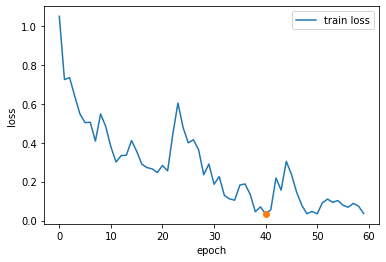

In [24]:
model.apply(network_f.weight_reset)
optimizer = optim.Adam(model.parameters(), lr=0.001)

best_params = network_f.trainNet(model, criterion, optimizer, dataloaders, epochs=60)

In [25]:
model.load_state_dict(best_params)

<All keys matched successfully>

### evaluate

In [26]:
print("evaluation results on train data")
loader = data_f.createLoader(inputs, labels[:,0], batch_size=32)
print(network_f.evaluate(model, loader))

evaluation results on train data
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        77
           1     1.0000    1.0000    1.0000        84
           2     1.0000    1.0000    1.0000        90
           3     1.0000    1.0000    1.0000       108
           4     1.0000    1.0000    1.0000        55

    accuracy                         1.0000       414
   macro avg     1.0000    1.0000    1.0000       414
weighted avg     1.0000    1.0000    1.0000       414



## Leave one out cross validation on groups

as mentioned in the dataset: https://ieeexplore.ieee.org/document/7887697

In [27]:
score_types = ['ScoreValence', 'ScoreArousal', 'ScoreDominance']
results = dict.fromkeys(score_types)
for score_type in results:
  results[score_type] = {'Accuracy':[], 'F1 Score':[]}

def print_scores(results):
  for metric in ['Accuracy', 'F1 Score']:
    print(metric)
    for score_type in score_types:
      print(f'{score_type} : {np.mean(results[score_type][metric]):.4f}')
    print()

In [ ]:
for person in tqdm(data):

  person_signals = []
  for vid in tqdm(range(18), leave=False):
    signal_vals = []
    for signal_type in ['EEG', 'ECG']:
      for signal_mode in ['baseline', 'stimuli']:
        signal = person[signal_type][signal_mode][vid]
        for channel in np.swapaxes(signal,0,1):
          ch_interp = np.interp(np.linspace(0,len(channel)-1,32768), range(len(channel)), channel)  # interpolate
          signal_vals.append(ch_interp)
    person_signals.append(signal_vals)

  person_signals = np.array(person_signals) # normalize
  data_f.normalize(person_signals)

  scores = np.swapaxes([vals for info, vals in person.items() if 'Score' in info], 0, 1)
  scores = np.where(scores>=2.5, 1, 0).astype(float)

  # divide into groups as mentioned in the paper: https://ieeexplore.ieee.org/document/7887697
  groups = np.random.choice(range(18), (8,2), replace=False)
  single_groups = [i for i in range(18) if i not in groups]
  groups = [list(group) for group in groups] + single_groups

  for test_group in tqdm(groups):
    train_groups = [group for group in groups if group!=test_group]
    train_groups = np.hstack(train_groups)
    if type(test_group) == int: test_group = [test_group]
    
    train_inputs, train_labels = person_signals[train_groups], scores[train_groups]
    test_inputs, test_labels = person_signals[test_group], scores[test_group]

    #for score_indx, score_type in enumerate(['ScoeValence', 'ScoreArousal', 'ScoreDominance']):
    dataloaders = data_f.create_trainValLoaders(train_inputs, train_labels, test_size=1, batch_size=2)
    dataloaders['test'] = data_f.createLoader(test_inputs, test_labels, batch_size=2)

    model = network_architectures.Conv_Classifier(num_classes=3, inp_channels=32)
    model = model.to(device)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    best_params = network_f.trainNet(model, criterion, optimizer, {'train':dataloaders['train']}, epochs=10, verbose=0)
    model.load_state_dict(best_params)

    lbl_true, lbl_pred = network_f.get_predn(model, dataloaders['test'], predict_fn='threshold')
    lbl_true, lbl_pred = list(zip(*lbl_true)), list(zip(*lbl_pred))

    for score_indx, score_type in enumerate(score_types):
      results[score_type]['F1 Score'].append(f1_score(lbl_true[score_indx], lbl_pred[score_indx]))
      results[score_type]['Accuracy'].append(accuracy_score(lbl_true[score_indx], lbl_pred[score_indx]))
  
  print_scores(results)
  # break

view final scores

In [29]:
print_scores(results)

Accuracy
ScoreValence : 0.5000
ScoreArousal : 0.6196
ScoreDominance : 0.6370

F1 Score
ScoreValence : 0.3580
ScoreArousal : 0.6261
ScoreDominance : 0.6406

